[D-WaveのSDKや実機サービスの使い方を確認する。](https://qiita.com/YuichiroMinato/items/57cb8504ab61930eb479)

In [ ]:
#!pip install Dwave-ocean-sdk

In [12]:
#ツール読み込み
import dimod

#ソルバーの選択
solver = dimod.ExactSolver()

#イジングの準備
response = solver.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})

#エネルギーを返す
response.data_vectors['energy']

array([-1.5, -0.5, -0.5,  2.5])

In [13]:
import dimod
solver = dimod.ExactSolver()
response = solver.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})
for datum in response.data(['sample', 'energy']):     
    print(datum.sample, datum.energy)

{'a': -1, 'b': -1} -1.5
{'a': 1, 'b': -1} -0.5
{'a': 1, 'b': 1} -0.5
{'a': -1, 'b': 1} 2.5


In [14]:
import neal
solver = neal.SimulatedAnnealingSampler()
response = solver.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1}, num_reads=2)
response.data_vectors['energy']

array([-1.5, -1.5])

In [10]:
from dwave.cloud import Client
client = Client.from_config(token='DEV-6a425d517b4cc6a3e4f9fef6c26af9cd037b879e')
client.get_solvers()

[StructuredSolver(id='DW_2000Q_6'), UnstructuredSolver(id='hybrid_v1')]

In [16]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler(endpoint='https://cloud.dwavesys.com/sapi', token='DEV-6a425d517b4cc6a3e4f9fef6c26af9cd037b879e', solver='DW_2000Q_6'))
response = sampler.sample_ising({'a': -0.5, 'b': 1.0}, {('a', 'b'): -1})
response.data_vectors['energy'] 

array([-1.5])

In [17]:
import networkx as nx
s5 = nx.star_graph(4)

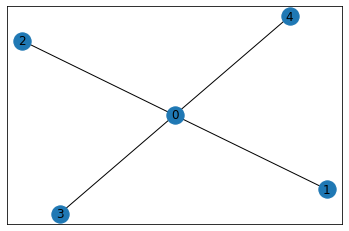

In [18]:
import matplotlib.pyplot as plt
nx.draw_networkx(s5)
plt.show()

In [ ]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave_networkx as dnx

sampler = EmbeddingComposite(DWaveSampler())
#print(dnx.min_vertex_cover(s5, sampler))

In [20]:
!pip install dwave-qbsolv

In [21]:
from dwave_qbsolv import QBSolv
Q = {(0, 0): 1, (1, 1): 1, (0, 1): 1}
response = QBSolv().sample_qubo(Q)
print("samples=" + str(list(response.samples())))
print("energies=" + str(list(response.data_vectors['energy'])))

samples=[{0: 0, 1: 0}]
energies=[-0.0]
